In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
# from towardsdatascience.com and author is Adarsh Menon "Linear Regression in 6 lines of python"-- TDS will be shorthand
from sklearn.linear_model import LinearRegression

In [2]:
path_towers="cell_states.csv"
path_bees= "bee_v2.csv"

towers_df=pd.read_csv(path_towers)
towers_df=pd.read_csv(path_towers)
towers_df_abc=towers_df.sort_values("NAME")
towers_final=towers_df_abc.reset_index()
towers_final_drop=towers_final.drop([6,7,26,27,37])

In [3]:
# grouping the bee colonies that have been lost by state and year and then only counting the unknown. The unknow
# is the only column that is loss that could possibly be because of the towers according to the bee_v2 csv that came
# from the USDA
bees_df=pd.read_csv(path_bees)
bees_states= bees_df.groupby(["State"])["Lost Unknown"].mean()
bee_loss_avg=pd.DataFrame(bees_states)
bee_loss_drop=bee_loss_avg.drop(["Hawaii"])


In [4]:
X = towers_final_drop.iloc[:, 3].values.reshape(-1, 1)  # values converts it into a numpy array
Y = bee_loss_drop.iloc[:, 0].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

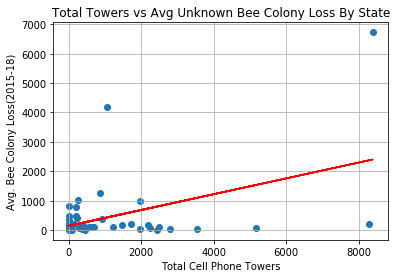

In [5]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.title("Total Towers vs Avg Unknown Bee Colony Loss By State")
plt.xlabel("Total Cell Phone Towers")
plt.ylabel("Avg. Bee Colony Loss(2015-18)")
plt.grid()

plt.show()



In [6]:
stats.pearsonr(X, Y)

(array([0.44339668]), array([0.00257413]))